# N2V Prediction
Please run the ```01_N2VTraining.ipynb``` before.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from tifffile import imread
import sys
sys.path.append('../../')
from unet.model import UNet
from pn2v.utils import denormalize
from pn2v.utils import normalize
from pn2v.utils import PSNR
from pn2v import utils
from pn2v import prediction
import pn2v.training
from pn2v import histNoiseModel

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
# We need the training data in order to calulate 'mean' and 'std' for normalization
path='../../data/Mouse skull nuclei/'

# Load the test data
dataTest=imread(path+"example2_digital_offset300.tif")[:,:,:256] 
# We are loading only a sub image to speed up computation

# We estimate the ground truth by averaging.
dataTestGT=np.mean(dataTest[:,...],axis=0)[np.newaxis,...]


### Load the Network and Noise Model
Ensure that ```dataName``` is set same as in ```01_N2VTraining.ipynb```.

In [3]:
dataName = 'mouseskullnuclei' # Use the same name as used in N2VTraining.ipynb. This is a part of model name created in N2VTraining.ipynb 
nameModel=dataName+'_n2v'

### Load the Network

In [4]:
# Load the network, created in the '01_N2VTraining.ipynb' notebook
net=torch.load(path+"/last_"+nameModel+".net")

/home/lalit/Desktop/01_Softwares/anaconda3/envs/ppn2vEnv/lib/python3.7/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU1 NVS 310 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


### Evaluation

image: 0
PSNR input 28.02423798473431
PSNR prior 35.64500573196685
PSNR mse 35.64500573196685
-----------------------------------
image: 1
PSNR input 28.065531602490644
PSNR prior 35.76517117867779
PSNR mse 35.76517117867779
-----------------------------------
image: 2
PSNR input 28.035021421910734
PSNR prior 35.75586949159867
PSNR mse 35.75586949159867
-----------------------------------
image: 3
PSNR input 28.087744381628678
PSNR prior 35.811101863996385
PSNR mse 35.811101863996385
-----------------------------------
image: 4
PSNR input 28.061745249613562
PSNR prior 35.69083461070814
PSNR mse 35.69083461070814
-----------------------------------
image: 5
PSNR input 28.1086316653067
PSNR prior 35.82495710742784
PSNR mse 35.82495710742784
-----------------------------------
image: 6
PSNR input 28.11584919615069
PSNR prior 35.889060844962685
PSNR mse 35.889060844962685
-----------------------------------
image: 7
PSNR input 28.078571033189487
PSNR prior 35.78164215324645
PSNR mse 35.781

image: 66
PSNR input 28.129393849352013
PSNR prior 35.86678862417659
PSNR mse 35.86678862417659
-----------------------------------
image: 67
PSNR input 28.11863774042713
PSNR prior 35.830426174338584
PSNR mse 35.830426174338584
-----------------------------------
image: 68
PSNR input 28.0744924081312
PSNR prior 35.79876611517473
PSNR mse 35.79876611517473
-----------------------------------
image: 69
PSNR input 28.087115550087496
PSNR prior 35.86628578514486
PSNR mse 35.86628578514486
-----------------------------------
image: 70
PSNR input 28.100664171847036
PSNR prior 35.87550099507746
PSNR mse 35.87550099507746
-----------------------------------
image: 71
PSNR input 28.1022497917701
PSNR prior 35.825178093125345
PSNR mse 35.825178093125345
-----------------------------------
image: 72
PSNR input 28.147053880531487
PSNR prior 35.85431714481835
PSNR mse 35.85431714481835
-----------------------------------
image: 73
PSNR input 28.10360697863469
PSNR prior 35.87918034217247
PSNR mse 

image: 131
PSNR input 28.079838325466856
PSNR prior 35.82730558703554
PSNR mse 35.82730558703554
-----------------------------------
image: 132
PSNR input 28.115379662314908
PSNR prior 35.873253628649415
PSNR mse 35.873253628649415
-----------------------------------
image: 133
PSNR input 28.136598736570747
PSNR prior 35.85269018788469
PSNR mse 35.85269018788469
-----------------------------------
image: 134
PSNR input 28.155716038813438
PSNR prior 35.909881537524875
PSNR mse 35.909881537524875
-----------------------------------
image: 135
PSNR input 28.085705019467397
PSNR prior 35.84708846354306
PSNR mse 35.84708846354306
-----------------------------------
image: 136
PSNR input 28.109437508908528
PSNR prior 35.873581420386465
PSNR mse 35.873581420386465
-----------------------------------
image: 137
PSNR input 28.120960359275994
PSNR prior 35.88147527898916
PSNR mse 35.88147527898916
-----------------------------------
image: 138
PSNR input 28.12270100924804
PSNR prior 35.870125596

image: 193
PSNR input 28.087727009670633
PSNR prior 35.73713970856972
PSNR mse 35.73713970856972
-----------------------------------
image: 194
PSNR input 28.11679210976056
PSNR prior 35.842621477475156
PSNR mse 35.842621477475156
-----------------------------------
image: 195
PSNR input 28.090294894327617
PSNR prior 35.78036303954472
PSNR mse 35.78036303954472
-----------------------------------
image: 196
PSNR input 28.091486625036325
PSNR prior 35.803349077485066
PSNR mse 35.803349077485066
-----------------------------------
image: 197
PSNR input 28.10041594229752
PSNR prior 35.80967612839235
PSNR mse 35.80967612839235
-----------------------------------
image: 198
PSNR input 28.142133401788897
PSNR prior 35.90807925233616
PSNR mse 35.90807925233616
-----------------------------------
image: 199
PSNR input 28.110352018291994
PSNR prior 35.756208710170455
PSNR mse 35.756208710170455
-----------------------------------
Avg PSNR Prior: 35.85508634390542 +-(2SEM) 0.008154834435135889
A

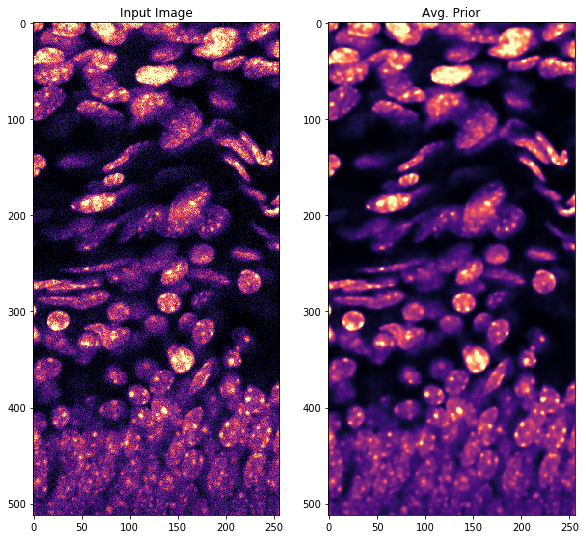

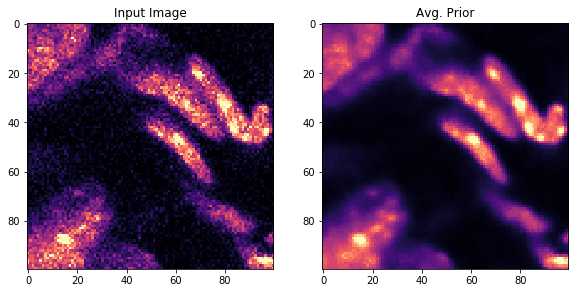

In [5]:
# Now we are processing data and calculating PSNR values.
results=[]
meanRes=[]
resultImgs=[]
inputImgs=[]

# We iterate over all test images.
for index in range(dataTest.shape[0]):
    
    im=dataTest[index]
    gt=dataTestGT[0] # The ground truth is the same for all images
    
    # We are using tiling to fit the image into memory
    # If you get an error try a smaller patch size (ps)
    
    means = prediction.tiledPredict(im, net ,ps=256, overlap=48,
                                            device=device, noiseModel=None)
    
    resultImgs.append(means)
    inputImgs.append(im)

    rangePSNR=np.max(gt)-np.min(gt)
    psnr=PSNR(gt, means,rangePSNR )
    psnrPrior=PSNR(gt, means,rangePSNR )
    results.append(psnr)
    meanRes.append(psnrPrior)

    print ("image:",index)
    print ("PSNR input",PSNR(gt, im, rangePSNR))
    print ("PSNR prior",psnrPrior) # Without info from masked pixel
    print ("PSNR mse",psnr) # MMSE estimate using the masked pixel
    print ('-----------------------------------')

    
    
    
# We display the results for the last test image       
vmi=np.percentile(gt,0.01)
vma=np.percentile(gt,99)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im, vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means, vmax=vma, vmin=vmi, cmap='magma')

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

print("Avg PSNR Prior:", np.mean(np.array(meanRes) ), '+-(2SEM)',2*np.std(np.array(meanRes) )/np.sqrt(float(len(meanRes)) ) )
print("Avg PSNR MMSE:", np.mean(np.array(results) ),  '+-(2SEM)' ,2*np.std(np.array(results) )/np.sqrt(float(len(results)) ) )